In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0

# Test Synthetic Anomaly Injection on Real and Simulated Data
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
import sys
sys.path.append('/home/ubuntu/TSADModelSelection/') # TODO: Make this relative path maybe
sys.path.append('/home/ubuntu/PyMAD/') # TODO: Make this relative path maybe

from data.generate_synthetic_data import multivariate_ts
from model_selection.inject_anomalies import InjectAnomalies

Feature 1 has an anomaly!
Correlation scaling vector: [ 0.53762183  1.         -0.54362855 -0.45143522  0.39133844]
Window size: 128
Anomaly start: 1471 end: 1599
Length of anomaly for flip, speedup, noise, cutoff, scale and wander anomalies: 1


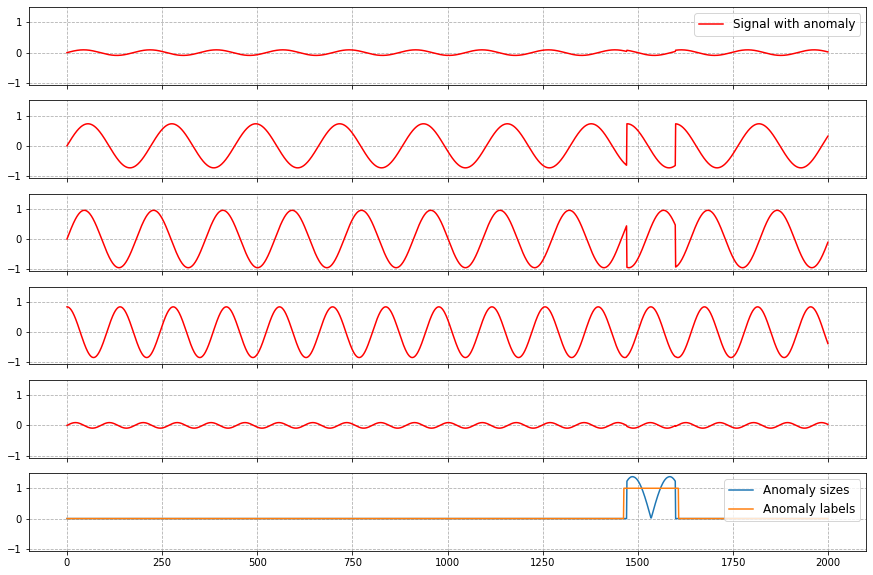

In [2]:
n_series = 5
n_time = 2000
T = multivariate_ts(n_series=n_series, n_time=n_time, eps_std=0, stop=0.75*4)

anomalyObj = InjectAnomalies(
                        random_state=np.random.randint(10000), 
                        verbose=True, 
                        max_window_size=128, 
                        min_window_size=8)
data_std = max(np.std(T), 0.01)
T_with_anomaly, anomaly_sizes, anomaly_labels = anomalyObj.inject_anomalies(T, 
                                                                scale=2*data_std, 
                                                                anomaly_type='flip',
                                                                random_parameters=False,
                                                                anomaly_size_type='mae',
                                                                max_anomaly_length=4,
                                                                constant_type='quantile', 
                                                                speed=4)
anomaly_sizes = anomaly_sizes/data_std

# Plot the figures
fig, axes = plt.subplots(n_series + 1, 1, figsize=(15, 2*n_series), sharey=True, sharex=True)
for i in range(n_series):
    # axes[i].plot(T[i, :], '--', label=f'Signal', c='b')
    axes[i].plot(T_with_anomaly[i, :], label=f'Signal with anomaly', c='r')
    axes[i].grid(ls='--')
axes[0].legend(fontsize=12, loc='upper right')
axes[n_series].plot(anomaly_sizes, label='Anomaly sizes')
axes[n_series].plot(anomaly_labels, label='Anomaly labels')
axes[n_series].legend(fontsize=12, loc='upper right')
axes[n_series].grid(ls='--')

In [2]:
from src.pymad.datasets.load import load_data
from model_selection.utils import visualize_data

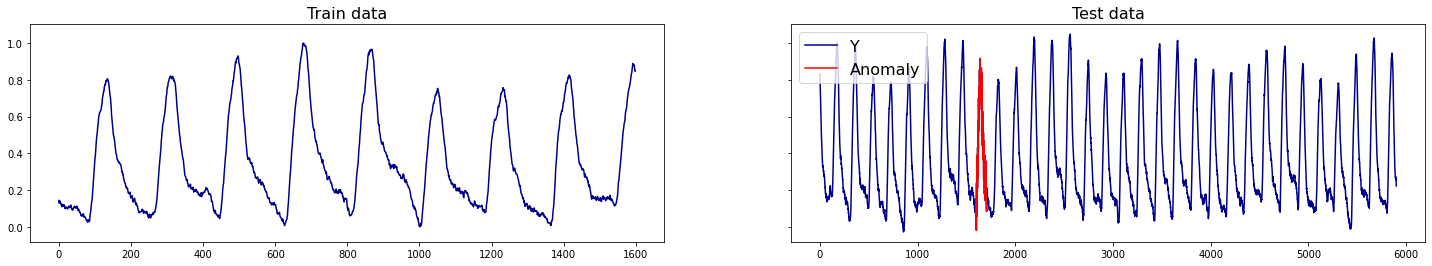

In [3]:
# Load the data
ENTITY = '028_UCR_Anomaly_DISTORTEDInternalBleeding17'
DATASET = 'anomaly_archive' # 'anomaly_archive'  'smd' 
train_data = load_data(dataset=DATASET, group='train', entities=[ENTITY], downsampling=10, min_length=256, root_dir='/home/ubuntu/datasets/', normalize=True, verbose=False)
test_data = load_data(dataset=DATASET, group='test', entities=[ENTITY], downsampling=10, min_length=256, root_dir='/home/ubuntu/datasets/', normalize=True, verbose=False)

# Now let's visualize the data
visualize_data(train_data, test_data)
## Now let's inject anomalies to the data and visualize it

Feature 0 has an anomaly!
Correlation scaling vector: [1.]
Window size: 128
Anomaly start: 682 end: 1194
Length of anomaly for flip, speedup, noise, cutoff, scale and wander anomalies: 4


Text(0.5, 1.0, 'Anomaly Scores')

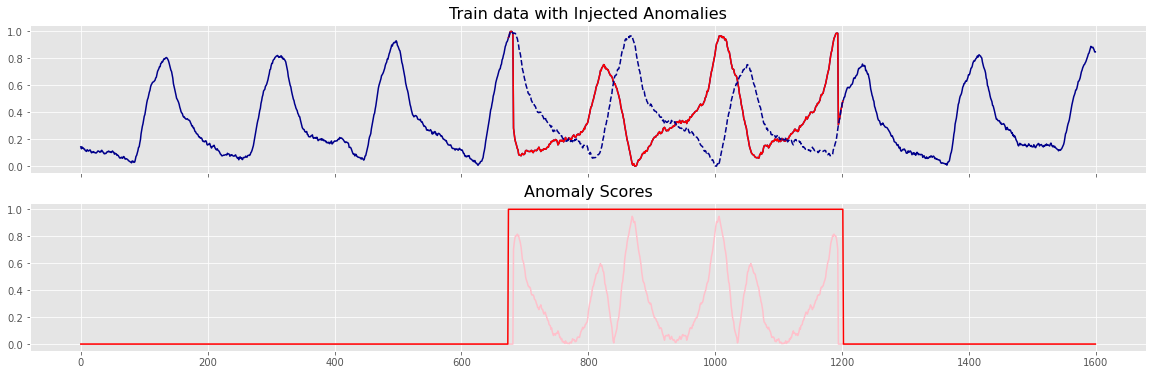

In [13]:
T = train_data.entities[0].Y

anomalyObj = InjectAnomalies(random_state=np.random.randint(10000), 
                             verbose=True, 
                             max_window_size=128, 
                             min_window_size=8)
data_std = max(np.std(T), 0.01)
T_with_anomaly, anomaly_sizes, anomaly_labels = anomalyObj.inject_anomalies(T, 
                                                            scale=2*data_std, 
                                                            anomaly_type='flip',
                                                            random_parameters=False,
                                                            anomaly_size_type='mae',
                                                            anomaly_propensity=0.2,
                                                            max_anomaly_length=8,
                                                            constant_type='quantile', 
                                                            noise_std=0.02,
                                                            baseline=0.2, 
                                                            speed=0.2, 
                                                            amplitude_scaling=2, 
                                                            ma_window=14)

anomaly_start = np.argmax(anomaly_labels)
anomaly_end = T_with_anomaly.shape[1] - np.argmax(anomaly_labels[::-1])

# anomaly_sizes = anomaly_sizes/data_std
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 6))
axes[0].plot(T_with_anomaly.flatten(), color='darkblue')
axes[0].plot(np.arange(anomaly_start, anomaly_end), T_with_anomaly.flatten()[anomaly_start:anomaly_end], color='red')
axes[0].plot(np.arange(anomaly_start, anomaly_end), T.flatten()[anomaly_start:anomaly_end], color='darkblue', linestyle = '--')
axes[0].set_title('Train data with Injected Anomalies', fontsize=16)
axes[1].plot(anomaly_sizes.flatten(), color='pink')
axes[1].plot(anomaly_labels.flatten(), color='red')
axes[1].set_title('Anomaly Scores', fontsize=16)

Average the anomaly score across a window
Max the anomaly score across a window

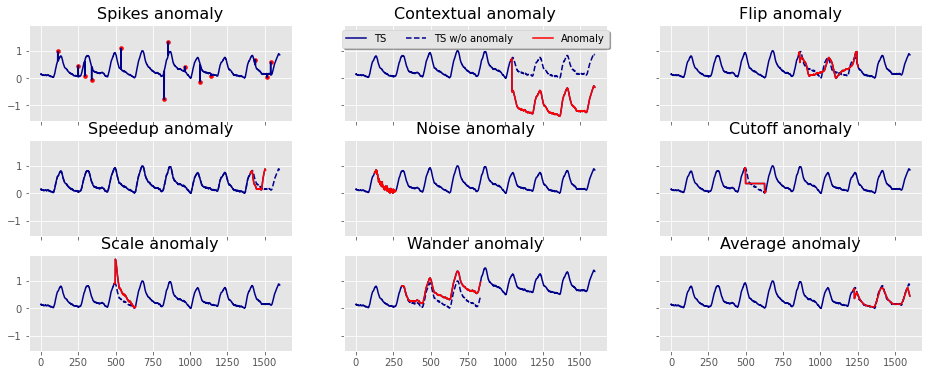

In [32]:
np.unique(anomaly_labels)

array([0., 1.])